<a href="https://colab.research.google.com/github/nk755799/IDS/blob/main/HW6/HW6r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project6 (HW6)    
Naresh Kalluri (10755799)   
Github repository: https://github.com/nk755799/IDS/tree/main/HW6**

Installling all the required 

In [72]:
# installing required lib
install.packages("C50")
install.packages("caret")
install.packages("rpart.plot")  
install.packages('party')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
# Importing all the libraries
library(repr)
library(rpart)
library(caret)
library(C50)
library(rpart.plot)
library(ggplot2)
library(party)

In [75]:
# import dataset
train_DF <- read.csv("https://raw.githubusercontent.com/nk755799/IDS/main/HW6/Loans_Training.csv")
test_DF <- read.csv("https://raw.githubusercontent.com/nk755799/IDS/main/HW6/Loans_Test.csv")

In [76]:
# display rows
head(train_DF)

,Approval,Debt.to.Income.Ratio,FICO.Score,Request.Amount,Interest
,<lgl>,<dbl>,<int>,<int>,<dbl>
1,FALSE,0,397,1000,450
2,FALSE,0,403,500,225
3,FALSE,0,408,1000,450
4,FALSE,0,408,2000,900
5,FALSE,0,411,5000,2250
6,FALSE,0,413,5000,2250


In [77]:
# shape of the data frame

dim(train_DF)

[1] 150302      5

In [78]:
# Column names
colnames(train_DF)

[1] "Approval"             "Debt.to.Income.Ratio" "FICO.Score"          
[4] "Request.Amount"       "Interest"

In [79]:
# check null values in trainingDF
sum(is.na(train_DF))

[1] 0

In [80]:
# check null values in testDF
sum(is.na(test_DF))

[1] 0

In [81]:
# summary of dataset
summary(train_DF)

  Approval       Debt.to.Income.Ratio   FICO.Score  Request.Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  

In [82]:
# Describe the structure of the data frame

str(train_DF)

'data.frame':	150302 obs. of  5 variables:
 $ Approval            : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt.to.Income.Ratio: num  0 0 0 0 0 0 0 0 0 0 ...
 $ FICO.Score          : int  397 403 408 408 411 413 416 421 422 432 ...
 $ Request.Amount      : int  1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num  450 225 450 900 2250 2250 2700 900 5400 4500 ...


# **Creating cart model**

In [84]:
cart_training1 <- rpart(Approval~., data = train_DF, cp=.01)

In [85]:
summary(cart_training1)

Call:
rpart(formula = Approval ~ ., data = train_DF, cp = 0.01)
  n= 150302 

          CP nsplit rel error    xerror         xstd
1 0.37536172      0 1.0000000 1.0000088 6.814015e-06
2 0.12857983      1 0.6246383 0.6250474 2.069369e-03
3 0.01133642      2 0.4960584 0.4965429 2.355135e-03
4 0.01000000      3 0.4847220 0.4852428 2.338719e-03

Variable importance
          FICO.Score Debt.to.Income.Ratio             Interest 
                  71                   24                    3 
      Request.Amount 
                   3 

Node number 1: 150302 observations,    complexity param=0.3753617
  mean=0.5005655, MSE=0.2499997 
  left son=2 (46002 obs) right son=3 (104300 obs)
  Primary splits:
      FICO.Score           < 659.5 to the left,  improve=0.37536170, (0 missing)
      Debt.to.Income.Ratio < 0.305 to the right, improve=0.11958450, (0 missing)
      Request.Amount       < 25500 to the right, improve=0.01585947, (0 missing)
      Interest             < 11475 to the right, impr

# Visualize the decision tree for cart model

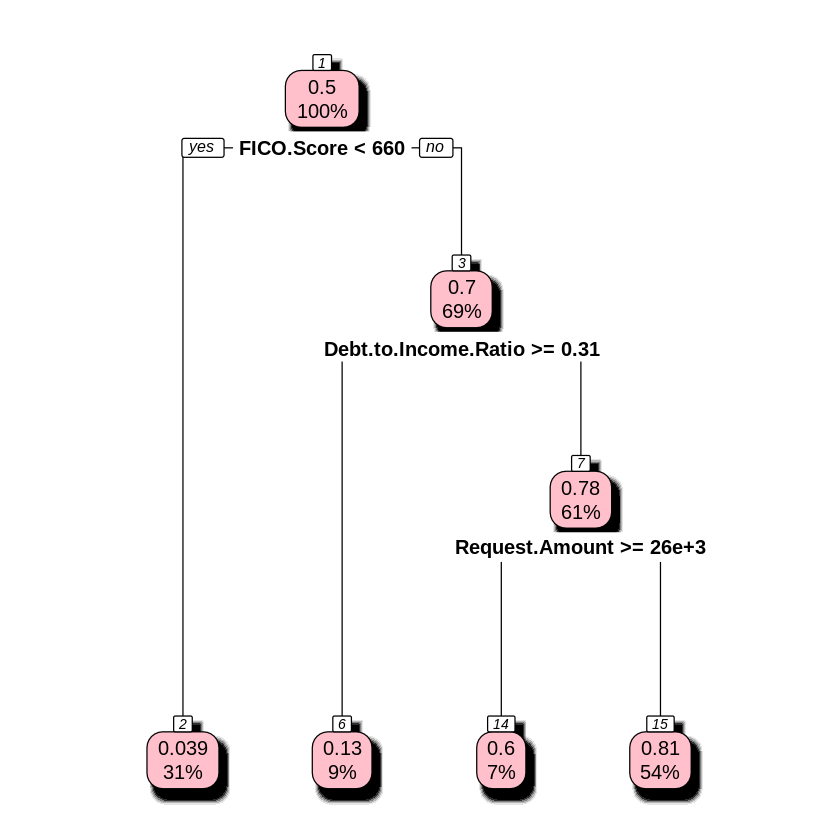

In [86]:
rpart.plot(cart_training1, box.palette="pink", shadow.col="black", nn=TRUE)

# Confusion matrix for cart model


In [88]:
cart_model_prediction <- predict(cart_training1, test_DF, type = "vector") >= 0.5

In [89]:
confusionMatrix(table(test_DF$Approval, cart_model_prediction))

Confusion Matrix and Statistics

       cart_model_prediction
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        

# Accuracy for cart model 

In [90]:
accuracy <- sum( cart_model_prediction == test_DF$Approval ) / length( cart_model_prediction )
accuracy

[1] 0.8432331

# **Creating C5.0 model**

In [91]:
c5model_train <- C5.0(x = train_DF[, -1], y = as.factor(train_DF$Approval), control=C5.0Control(minCases=1000))

In [92]:
summary(c5model_train)


Call:
C5.0.default(x = train_DF[, -1], y = as.factor(train_DF$Approval), control
 = C5.0Control(minCases = 1000))


C5.0 [Release 2.07 GPL Edition]  	Wed Apr 20 01:19:53 2022
-------------------------------

Class specified by attribute `outcome'

Read 150302 cases (5 attributes) from undefined.data

Decision tree:

Debt.to.Income.Ratio > 0.31: FALSE (19884/1160)
Debt.to.Income.Ratio <= 0.31:
:...FICO.Score <= 655: FALSE (35346/894)
    FICO.Score > 655:
    :...FICO.Score <= 669:
        :...Request.Amount > 23000: FALSE (1547/529)
        :   Request.Amount <= 23000:
        :   :...FICO.Score <= 661: FALSE (3246/1418)
        :       FICO.Score > 661: TRUE (5892/2056)
        FICO.Score > 669:
        :...Debt.to.Income.Ratio <= 0.25: TRUE (75846/13356)
            Debt.to.Income.Ratio > 0.25:
            :...Request.Amount <= 25000: TRUE (7112/2658)
                Request.Amount > 25000: FALSE (1429/455)


Evaluation on training data (150302 cases):

	    Decision Tree   
	  ----

# Decision Tree for C5.0 model

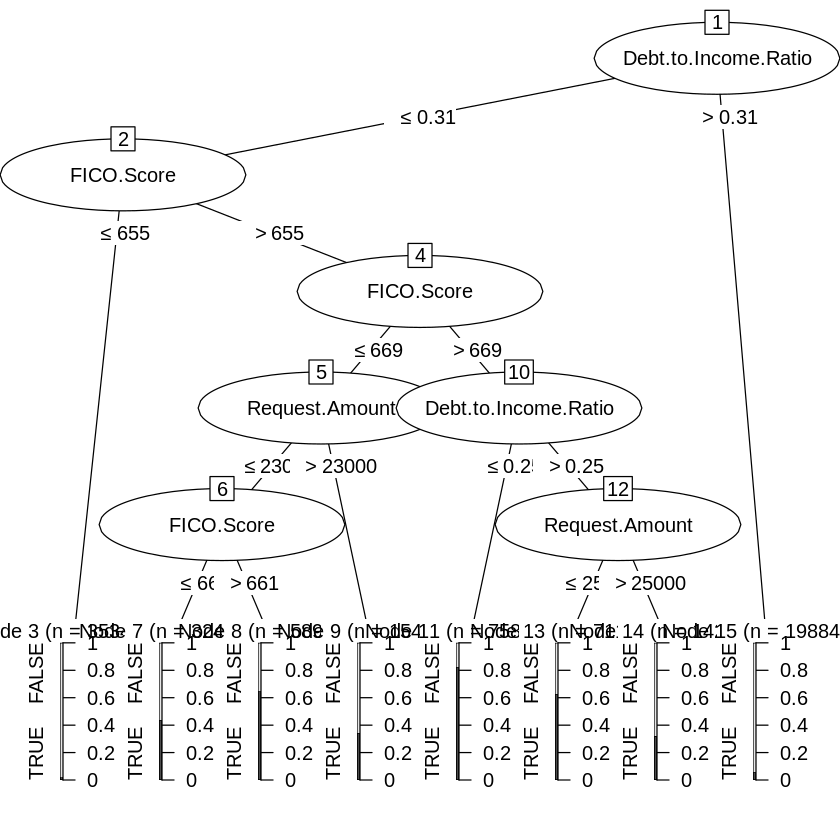

In [65]:
plot(c5model_train)

# Display confusion matrix 

In [66]:
c5_model_prediction <- predict(c5model_train, test_DF, type = "class") 

Confusion Matrix and Statistics

       c5_model_prediction
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                        

In [ ]:
confusionMatrix(table(test_DF$Approval, c5_model_prediction))

# Accuracy for c5.0 model

In [93]:
accuracy2 <- sum( c5_model_prediction == test_DF$Approval ) / length( c5_model_prediction )
accuracy2

[1] 0.8471568

We are getting 0.84 percent of accuracy using cart model.

# Compare model



In [96]:
modelnames <- c("CART","C5.0")
accuracy_model = c(cart_model_accuracy, c5_model_accuracy)

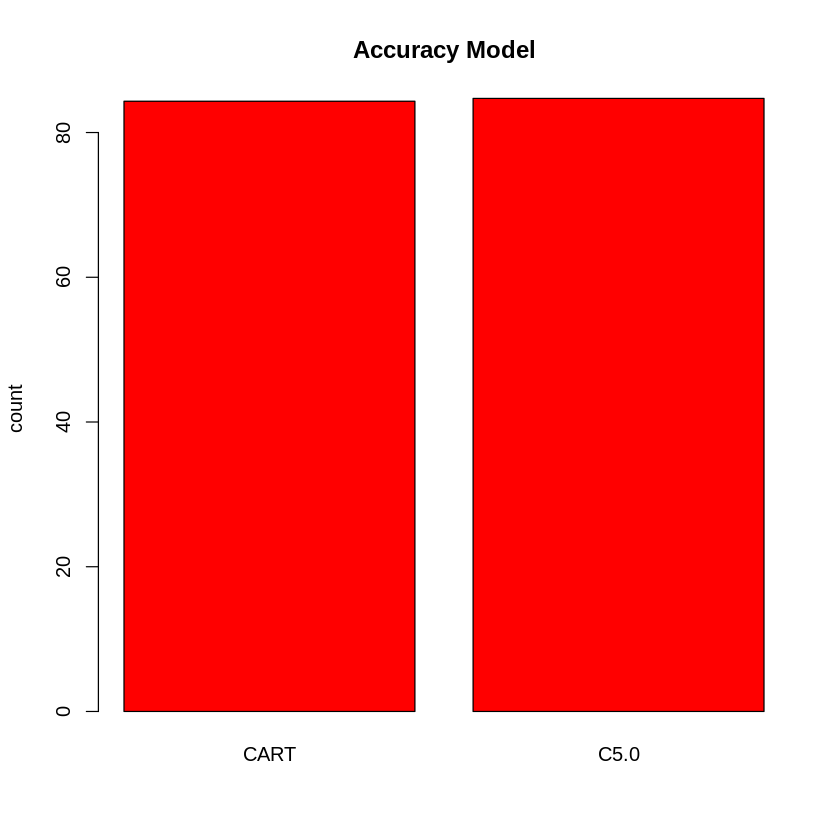

In [98]:
barplot(accuracy_model, main = "Accuracy Model",
            ylab = "count",names.arg = modelnames,col="red")